<a href="https://colab.research.google.com/github/shumshersubashgautam/Graphein-Bioinformatics-chemistry/blob/main/PPI_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/a-r-j/graphein.git

Cloning into 'graphein'...
remote: Enumerating objects: 6812, done.
remote: Counting objects: 100% (921/921), done.
remote: Compressing objects: 100% (332/332), done.
remote: Total 6812 (delta 755), reused 658 (delta 589), pack-reused 5891
Receiving objects: 100% (6812/6812), 89.40 MiB | 22.09 MiB/s, done.
Resolving deltas: 100% (4081/4081), done.


In [2]:
cd graphein

/content/graphein


In [3]:
!pip install graphein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 KB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 24.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 630.1/630.1 KB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 KB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.9/191.9 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import logging
logging.getLogger('urllib3').setLevel(level=logging.CRITICAL)
#logging.getLogger('matplotlib').setLevel(logging.CRITICAL)

In [5]:
from graphein.ppi.config import PPIGraphConfig
config = PPIGraphConfig()
config

PPIGraphConfig(paginate=True, ncbi_taxon_id=9606, kwargs={'STRING_escore': 0.2, 'BIOGRID_throughputTag': 'high'}, string_config=None, biogrid_config=None)

In [6]:
protein_list = ["CDC42", "CDK1", "KIF23", "PLK1", "RAC2", "RACGAP1", "RHOA", "RHOB"]

In [7]:
from graphein.ppi.graphs import compute_ppi_graph
from graphein.ppi.edges import add_string_edges, add_biogrid_edges

edge_construction_funcs=[add_string_edges, add_biogrid_edges]

g = compute_ppi_graph(config=config,
                      protein_list=protein_list,
                      edge_construction_funcs=edge_construction_funcs
                     )

[03/19/23 05:52:19] DEBUG    Added 8 nodes to graph                                                    ]8;id=946583;file:///content/graphein/graphein/ppi/graphs.py\graphs.py]8;;\:]8;id=830611;file:///content/graphein/graphein/ppi/graphs.py#94\94]8;;\

                    DEBUG    Added 44 string interaction edges                                          ]8;id=36371;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=331677;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\

                    DEBUG    Added 24 biogrid interaction edges                                         ]8;id=994070;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=286594;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\

In [8]:
from graphein.ppi.visualisation import plotly_ppi_graph

plotly_ppi_graph(g)

In [9]:
g.edges(data=True)

EdgeDataView([('CDC42', 'PLK1', {'kind': {'string'}}), ('CDC42', 'KIF23', {'kind': {'string'}}), ('CDC42', 'RACGAP1', {'kind': {'string'}}), ('CDC42', 'CDK1', {'kind': {'string'}}), ('CDC42', 'RHOB', {'kind': {'biogrid', 'string'}}), ('CDC42', 'RHOA', {'kind': {'biogrid', 'string'}}), ('CDC42', 'RAC2', {'kind': {'biogrid', 'string'}}), ('CDK1', 'RHOA', {'kind': {'string'}}), ('CDK1', 'PLK1', {'kind': {'string'}}), ('CDK1', 'KIF23', {'kind': {'string'}}), ('CDK1', 'RACGAP1', {'kind': {'biogrid', 'string'}}), ('KIF23', 'RHOA', {'kind': {'string'}}), ('KIF23', 'PLK1', {'kind': {'biogrid', 'string'}}), ('KIF23', 'RACGAP1', {'kind': {'biogrid', 'string'}}), ('PLK1', 'RACGAP1', {'kind': {'biogrid', 'string'}}), ('PLK1', 'RHOA', {'kind': {'string'}}), ('PLK1', 'RHOB', {'kind': {'biogrid'}}), ('RAC2', 'RACGAP1', {'kind': {'string'}}), ('RAC2', 'RHOA', {'kind': {'biogrid', 'string'}}), ('RAC2', 'RHOB', {'kind': {'string'}}), ('RACGAP1', 'RHOB', {'kind': {'biogrid', 'string'}}), ('RACGAP1', 'RHO

In [10]:
from graphein.ppi.features.node_features import add_sequence_to_nodes

g = compute_ppi_graph(config=config,
                      protein_list=protein_list,
                      edge_construction_funcs= edge_construction_funcs,
                      node_annotation_funcs=[add_sequence_to_nodes]
                     )

Creating directory /root/.config/bioservices 


[03/19/23 05:53:08] DEBUG    Added 8 nodes to graph                                                    ]8;id=321860;file:///content/graphein/graphein/ppi/graphs.py\graphs.py]8;;\:]8;id=972903;file:///content/graphein/graphein/ppi/graphs.py#94\94]8;;\

WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /


Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done


WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
WARNING [bioservices.HGNC:687]:  URL of the services contains a double //.Check your URL and remove trailing /
W

[03/19/23 05:53:34] DEBUG    Added 44 string interaction edges                                          ]8;id=665269;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=189122;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\

                    DEBUG    Added 24 biogrid interaction edges                                         ]8;id=590715;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=321470;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\

In [11]:
for n, d in g.nodes(data=True):
    print(d)

{'protein_id': 'CDC42', 'uniprot_ids': ['P60953'], 'sequence_P60953': 'MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMIGGEPYTLGLFDTAGQEDYDRLRPLSYPQTDVFLVCFSVVSPSSFENVKEKWVPEITHHCPKTPFLLVGTQIDLRDDPSTIEKLAKNKQKPITPETAEKLARDLKAVKYVECSALTQKGLKNVFDEAILAALEPPEPKKSRRCVLL'}
{'protein_id': 'CDK1', 'uniprot_ids': ['P06493'], 'sequence_P06493': 'MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGIPIRVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFNDLDNQIKKM'}
{'protein_id': 'KIF23', 'uniprot_ids': ['Q02241'], 'sequence_Q02241': 'MKSARAKTPRKPTVKKGSQTNLKDPVGVYCRVRPLGFPDQECCIEVINNTTVQLHTPEGYRLNRNGDYKETQYSFKQVFGTHTTQKELFDVVANPLVNDLIHGKNGLLFTYGVTGSGKTHTMTGSPGEGGLLPRCLDMIFNSIGSFQAKRYVFKSNDRNSMDIQCEVDALLERQKREAMPNPKTSSSKRQVDPEFADMITVQEFCKAEEVDEDSVYGVFVSYIEIYNNYIYDLLEEVPFDPIKPKPPQSKLLREDKNHNMYVAGCTEVEVKSTEEAFEVFWRGQKKRRIANTHL

[03/19/23 05:53:56] WARNING  To use the Graphein submodule                                         ]8;id=217225;file:///content/graphein/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=717359;file:///content/graphein/graphein/protein/features/sequence/embeddings.py#43\43]8;;\
                             graphein.protein.features.sequence.embeddings, you need to install:                   
                             biovec                                                                                
                             To do so, use the following command: pip install biovec                               

                    WARNING  To use the Graphein submodule graphein.protein.visualisation, you  ]8;id=92924;file:///content/graphein/graphein/protein/visualisation.py\visualisation.py]8;;\:]8;id=978688;file:///content/graphein/graphein/protein/visualisation.py#35\35]8;;\
                             need to install: pytorch3d                                                            
                             pytorch3d cannot be installed via pip                                                 

                    WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=104679;file:///content/graphein/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=324270;file:///content/graphein/graphein/protein/meshes.py#29\29]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: pip install pytorch3d                            

                    INFO     Downloaded AlphaFold PDB file for: P60953                                 ]8;id=860954;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=196812;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

[03/19/23 05:53:57] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=652387;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=731944;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 191 total nodes                                                 ]8;id=648247;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=754884;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

                    DEBUG    Reading meiler embeddings from:                                       ]8;id=786661;file:///content/graphein/graphein/protein/features/nodes/amino_acid.py\amino_acid.py]8;;\:]8;id=803474;file:///content/graphein/graphein/protein/features/nodes/amino_acid.py#57\57]8;;\
                             /content/graphein/graphein/protein/features/nodes/meiler_embeddings.c                 
                             sv                                                                                    

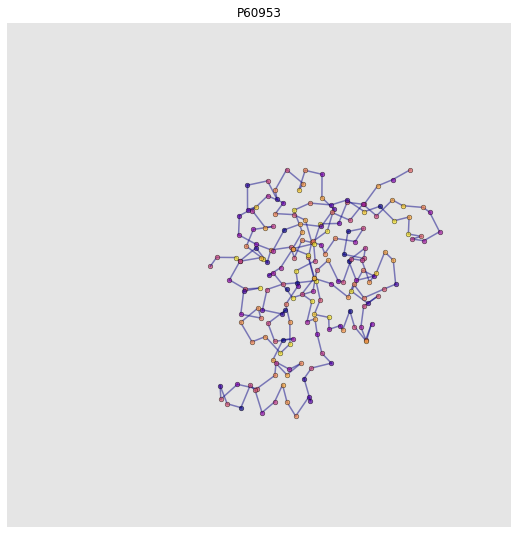

[03/19/23 05:53:59] INFO     Downloaded AlphaFold PDB file for: P06493                                 ]8;id=582565;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=167778;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

[03/19/23 05:54:00] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=492384;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=108707;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 297 total nodes                                                 ]8;id=105073;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=858931;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

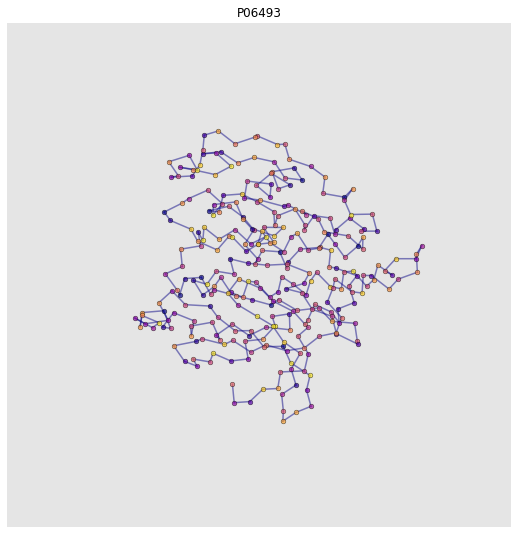

[03/19/23 05:54:04] INFO     Downloaded AlphaFold PDB file for: Q02241                                 ]8;id=170098;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=854591;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

[03/19/23 05:54:05] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=197791;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=52973;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 960 total nodes                                                 ]8;id=791777;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=456269;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

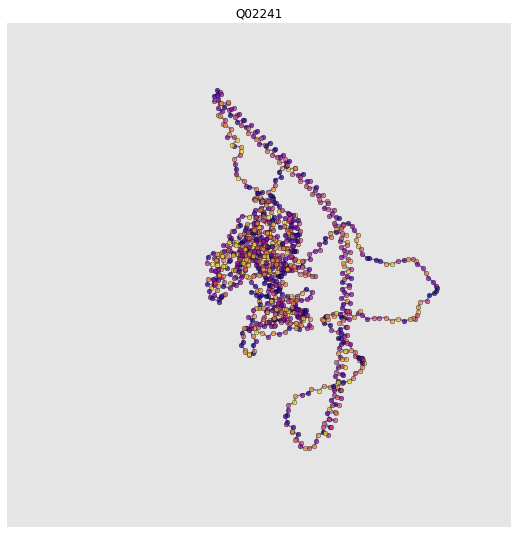

[03/19/23 05:54:17] INFO     Downloaded AlphaFold PDB file for: P53350                                 ]8;id=654686;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=979219;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

[03/19/23 05:54:18] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=486733;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=468752;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 603 total nodes                                                 ]8;id=216015;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=808333;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

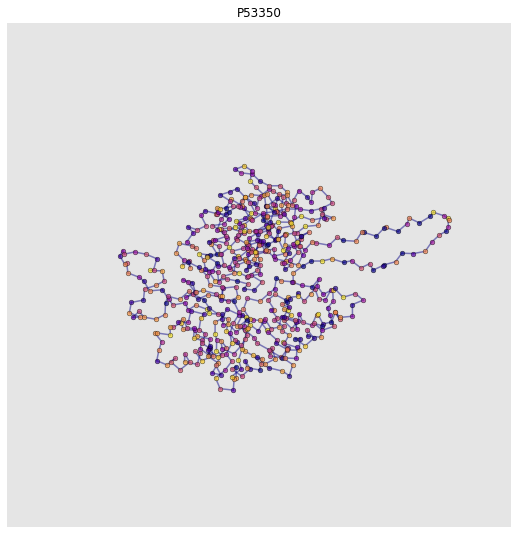

[03/19/23 05:54:31] INFO     Downloaded AlphaFold PDB file for: P15153                                 ]8;id=455060;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=744114;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=358459;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=768207;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 192 total nodes                                                 ]8;id=344198;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=474312;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

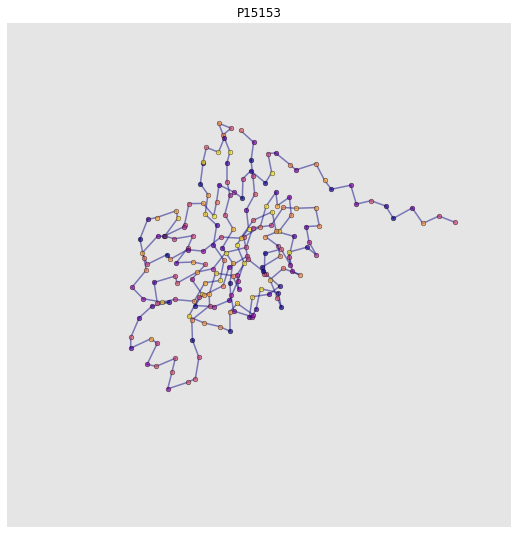

[03/19/23 05:54:34] INFO     Downloaded AlphaFold PDB file for: Q9H0H5                                 ]8;id=930015;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=924752;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=97545;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=43240;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 632 total nodes                                                 ]8;id=612553;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=559023;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

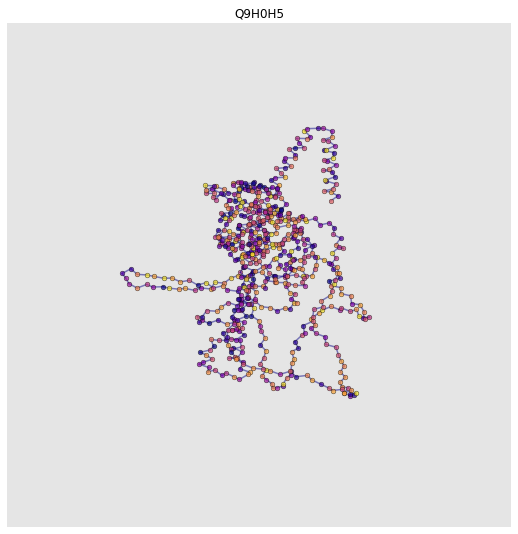

[03/19/23 05:54:43] INFO     Downloaded AlphaFold PDB file for: P61586                                 ]8;id=293748;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=373905;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

                    DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=499380;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=428869;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 193 total nodes                                                 ]8;id=958931;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=939725;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

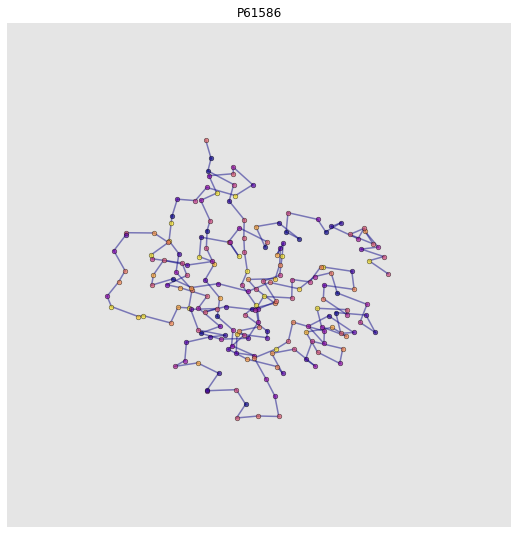

[03/19/23 05:54:45] INFO     Downloaded AlphaFold PDB file for: P62745                                 ]8;id=721488;file:///content/graphein/graphein/protein/utils.py\utils.py]8;;\:]8;id=824863;file:///content/graphein/graphein/protein/utils.py#323\323]8;;\

Output()

/usr/local/lib/python3.9/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/graphein/graphein/protein/graphs.py:153: FutureWarning:

The default value of regex will change from True to False in a future version.

/content/graphein/graphein/protein/graphs.py:156: FutureWarning:

The default value of regex will change from True to False in a future version.

[03/19/23 05:54:46] DEBUG    Deprotonating protein. This removes H atoms from the pdb_df dataframe    ]8;id=382206;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=481151;file:///content/graphein/graphein/protein/graphs.py#179\179]8;;\

                    DEBUG    Detected 196 total nodes                                                 ]8;id=661889;file:///content/graphein/graphein/protein/graphs.py\graphs.py]8;;\:]8;id=974975;file:///content/graphein/graphein/protein/graphs.py#431\431]8;;\

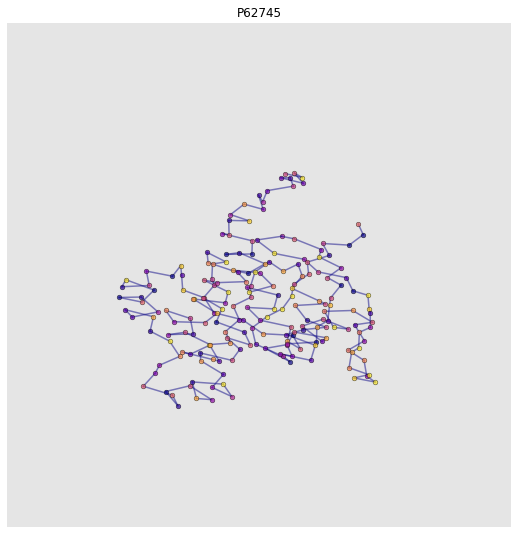

In [12]:
import matplotlib.pyplot as plt
logging.getLogger("matplotlib").setLevel(logging.WARNING)

from graphein.protein.config import ProteinGraphConfig
from graphein.protein.graphs import construct_graph
from graphein.protein.utils import download_alphafold_structure
from graphein.protein.visualisation import plot_protein_structure_graph

pg_config = ProteinGraphConfig()

# Iterate over nodes in PPI Graph
for n, d in g.nodes(data=True):
    try:
        fp = download_alphafold_structure(d['uniprot_ids'][0])[0]
        pg = construct_graph(pg_config, pdb_path=fp)
    
        # Add protein graph as node feature
        d['protein_graph'] = pg
    
        # Plot
        ax = plot_protein_structure_graph(pg, label_node_ids=False, colour_nodes_by="residue_name")
        ax.set_title(d["uniprot_ids"][0])
        plt.show()
    except:
        print(f"Failed to construct graph for {d['uniprot_ids'][0]}")
        continue

In [13]:
for n, d in g.nodes(data=True):
    print(d)

{'protein_id': 'CDC42', 'uniprot_ids': ['P60953'], 'sequence_P60953': 'MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMIGGEPYTLGLFDTAGQEDYDRLRPLSYPQTDVFLVCFSVVSPSSFENVKEKWVPEITHHCPKTPFLLVGTQIDLRDDPSTIEKLAKNKQKPITPETAEKLARDLKAVKYVECSALTQKGLKNVFDEAILAALEPPEPKKSRRCVLL', 'protein_graph': <networkx.classes.graph.Graph object at 0x7f3cc5f59070>}
{'protein_id': 'CDK1', 'uniprot_ids': ['P06493'], 'sequence_P06493': 'MEDYTKIEKIGEGTYGVVYKGRHKTTGQVVAMKKIRLESEEEGVPSTAIREISLLKELRHPNIVSLQDVLMQDSRLYLIFEFLSMDLKKYLDSIPPGQYMDSSLVKSYLYQILQGIVFCHSRRVLHRDLKPQNLLIDDKGTIKLADFGLARAFGIPIRVYTHEVVTLWYRSPEVLLGSARYSTPVDIWSIGTIFAELATKKPLFHGDSEIDQLFRIFRALGTPNNEVWPEVESLQDYKNTFPKWKPGSLASHVKNLDENGLDLLSKMLIYDPAKRISGKMALNHPYFNDLDNQIKKM', 'protein_graph': <networkx.classes.graph.Graph object at 0x7f3cc49bdf40>}
{'protein_id': 'KIF23', 'uniprot_ids': ['Q02241'], 'sequence_Q02241': 'MKSARAKTPRKPTVKKGSQTNLKDPVGVYCRVRPLGFPDQECCIEVINNTTVQLHTPEGYRLNRNGDYKETQYSFKQVFGTHTTQKELFDVVANPLVNDLIHGKNGLLFTYGVTGSGKTHTMTGSPGEGGLLPRCLDMIFNSIGSF

**Plot SARS-CoV-2 host-virus proteins (Gordon et al., 2020)**

List of human interacting proteins (protein_list) retrieved from:

Gordon et al. (2020).


# #A SARS-CoV-2-Human Protein-Protein Interaction Map Reveals Drug Targets and Potential Drug-Repurposing. 

In [14]:
protein_list = ['AP3B1', 'BRD4', 'BRD2', 'CWC27', 'ZC3H18', 'SLC44A2', 'PMPCB',
       'YIF1A', 'ATP1B1', 'ACADM', 'ETFA', 'STOM', 'GGCX', 'ATP6V1A',
       'PSMD8', 'REEP5', 'PMPCA', 'ANO6', 'PITRM1', 'SLC30A9', 'FASTKD5',
       'SLC30A7', 'TUBGCP3', 'COQ8B', 'SAAL1', 'REEP6', 'INTS4',
       'SLC25A21', 'TUBGCP2', 'TARS2', 'RTN4', 'FAM8A1', 'AASS', 'AKAP8L',
       'AAR2', 'BZW2', 'RRP9', 'PABPC1', 'CSNK2A2', 'CSNK2B', 'G3BP1',
       'PABPC4', 'LARP1', 'FAM98A', 'SNIP1', 'UPF1', 'MOV10', 'G3BP2',
       'DDX21', 'RBM28', 'RPL36', 'GOLGA7', 'ZDHHC5', 'POLA1', 'PRIM1',
       'PRIM2', 'POLA2', 'COLGALT1', 'PKP2', 'AP2A2', 'GFER', 'ERGIC1',
       'AP2M1', 'GRPEL1', 'TBCA', 'SBNO1', 'BCKDK', 'AKAP8', 'MYCBP2',
       'SLU7', 'RIPK1', 'UBAP2L', 'TYSND1', 'PDZD11', 'PRRC2B', 'UBAP2',
       'ZNF318', 'CRTC3', 'USP54', 'ZC3H7A', 'LARP4B', 'RBM41', 'TCF12',
       'PPIL3', 'PLEKHA5', 'TBKBP1', 'CIT', 'HSBP1', 'PCNT', 'CEP43',
       'PRKAR2A', 'PRKACA', 'PRKAR2B', 'RDX', 'CENPF', 'TLE1', 'TLE3',
       'TLE5', 'GOLGA3', 'GOLGA2', 'GOLGB1', 'GRIPAP1', 'CEP350',
       'PDE4DIP', 'CEP135', 'CEP68', 'CNTRL', 'ERC1', 'GCC2', 'CLIP4',
       'NIN', 'CEP112', 'MIPOL1', 'USP13', 'GCC1', 'JAKMIP1', 'CDK5RAP2',
       'AKAP9', 'GORASP1', 'FYCO1', 'C1orf50', 'CEP250', 'TBK1', 'HOOK1',
       'NINL', 'GLA', 'IMPDH2', 'SIRT5', 'NUTF2', 'ARF6', 'RNF41',
       'SLC27A2', 'EIF4E2', 'POR', 'RAP1GDS1', 'WASHC4', 'FKBP15',
       'GIGYF2', 'IDE', 'TIMM10', 'ALG11', 'NUP210', 'TIMM29', 'DNAJC11',
       'TIMM10B', 'TIMM9', 'HDAC2', 'GPX1', 'TRMT1', 'ATP5MG', 'ATP6AP1',
       'SIGMAR1', 'ATP13A3', 'AGPS', 'CYB5B', 'ACSL3', 'CYB5R3', 'RALA',
       'COMT', 'RAB5C', 'RAB7A', 'RAB8A', 'RAB2A', 'RAB10', 'RAB14',
       'RHOA', 'RAB1A', 'GNB1', 'GNG5', 'LMAN2', 'MOGS', 'TOR1AIP1',
       'MTARC1', 'QSOX2', 'HS2ST1', 'NDUFAF2', 'SCCPDH', 'SCARB1',
       'NAT14', 'DCAKD', 'FAM162A', 'DNAJC19', 'SELENOS', 'PTGES2',
       'RAB18', 'MPHOSPH10', 'SRP72', 'ATE1', 'NSD2', 'SRP19', 'SRP54',
       'MRPS25', 'DDX10', 'LARP7', 'MEPCE', 'NGDN', 'EXOSC8', 'NARS2',
       'NOL10', 'CCDC86', 'SEPSECS', 'EXOSC5', 'EXOSC3', 'AATF', 'HECTD1',
       'MRPS2', 'MRPS5', 'EXOSC2', 'MRPS27', 'GTF2F2', 'FBN1', 'FBN2',
       'NUP214', 'NUP62', 'DCAF7', 'EIF4H', 'NUP54', 'MIB1', 'SPART',
       'NEK9', 'ZNF503', 'NUP88', 'NUP58', 'MAT2B', 'FBLN5', 'PPT1',
       'CUL2', 'MAP7D1', 'THTPA', 'ZYG11B', 'TIMM8B', 'RBX1', 'ELOC',
       'ELOB', 'HMOX1', 'TRIM59', 'ARL6IP6', 'VPS39', 'CLCC1', 'VPS11',
       'SUN2', 'ALG5', 'STOML2', 'NUP98', 'RAE1', 'MTCH1', 'HEATR3',
       'MDN1', 'PLOD2', 'TOR1A', 'STC2', 'PLAT', 'ITGB1', 'CISD3',
       'COL6A1', 'PVR', 'DNMT1', 'LOX', 'PCSK6', 'INHBE', 'NPC2', 'MFGE8',
       'OS9', 'NPTX1', 'POGLUT2', 'POGLUT3', 'ERO1B', 'PLD3', 'FOXRED2',
       'CHPF', 'PUSL1', 'EMC1', 'GGH', 'ERLEC1', 'IL17RA', 'NGLY1',
       'HS6ST2', 'SDF2', 'NEU1', 'GDF15', 'TM2D3', 'ERP44', 'EDEM3',
       'SIL1', 'POFUT1', 'SMOC1', 'PLEKHF2', 'FBXL12', 'UGGT2', 'CHPF2',
       'ADAMTS1', 'HYOU1', 'FKBP7', 'ADAM9', 'FKBP10', 'SLC9A3R1',
       'CHMP2A', 'CSDE1', 'TOMM70', 'MARK3', 'MARK2', 'DPH5', 'DCTPP1',
       'MARK1', 'PTBP2', 'BAG5', 'UBXN8', 'GPAA1', 'WFS1', 'ABCC1',
       'F2RL1', 'SCAP', 'DPY19L1', 'TMEM97', 'SLC30A6', 'TAPT1', 'ERMP1',
       'NLRX1', 'RETREG3', 'PIGO', 'FAR2', 'ECSIT', 'ALG8', 'TMEM39B',
       'GHITM', 'ACAD9', 'NDFIP2', 'BCS1L', 'NDUFAF1', 'TMED5', 'NDUFB9',
       'PIGS']

In [15]:
import networkx as nx
config = PPIGraphConfig()

g = compute_ppi_graph(config=config, protein_list=protein_list, edge_construction_funcs=edge_construction_funcs)
plotly_ppi_graph(g, node_size_multiplier=1, width=1000, height=1000, layout=nx.layout.circular_layout, edge_opacity=0.2)

[03/19/23 05:56:27] DEBUG    Added 332 nodes to graph                                                  ]8;id=919203;file:///content/graphein/graphein/ppi/graphs.py\graphs.py]8;;\:]8;id=295170;file:///content/graphein/graphein/ppi/graphs.py#94\94]8;;\

[03/19/23 05:56:28] DEBUG    Added 1856 string interaction edges                                        ]8;id=148709;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=646532;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\

[03/19/23 05:56:29] DEBUG    Added 2050 biogrid interaction edges                                       ]8;id=660496;file:///content/graphein/graphein/ppi/edges.py\edges.py]8;;\:]8;id=725153;file:///content/graphein/graphein/ppi/edges.py#86\86]8;;\